# **Prédire les cours des actions avec LSTM dans PyTorch**


Dans ce projet objectif est de créer un modèle simple permettant de prédire la valeur d'une action à partir des valeurs quotidiennes d'ouverture, de plus haut, de plus bas et de clôture. Le marché boursier étant extrêmement volatil, de nombreux facteurs peuvent influencer et influencer la valeur d'une action. Ce tutoriel utilise les paramètres suivants pour les données boursières :

- **Ouverture** : Cours de l'action à l'ouverture du marché.
- **Haut** : Cours le plus élevé auquel une action se négocie pendant les heures de bourse.
- **Bas** : Cours le plus bas auquel une action se négocie pendant les heures de bourse.
- **Clôture** : Cours de l'action à la clôture du marché. Ce cours est utilisé par les institutions financières comme valeur d'une action un jour donné, car il prend en compte tous les événements de la journée et les fluctuations éventuelles du marché.

L'importance globale de la valeur de clôture et son utilisation comme référence pour la valeur quotidienne d'une action indiquent que c'est cette valeur qui doit être utilisée dans la prédiction. Pour ce faire, vous pouvez créer un modèle qui utilise la mémoire à long terme (LSTM), une technique RNN, pour stocker et analyser de grands ensembles de données de séries chronologiques.

## __Table des matières__

1. [Introduction](#Introduction)
   1. [Recurrent neural network](#Recurrent-neural-network)
   2. [Long Short-Term Memory](#Long-Short-Term-Memory)
2. [Objectives](#Objectives)
3. [Setup](#Setup)
   1. [Installing required libraries](#Installing-Required-Libraries)
   2. [Importing required libraries](#Importing-Required-Libraries)
4. [Read and load the data](#Read-and-load-the-data)
5. [Scale the data](#Scale-the-data)
6. [Create test and training sets](#Create-test-and-training-sets)
7. [Define the LSTM and forward method](#Define-the-LSTM-and-forward-method)
8. [Train the model](#Train-the-model)
9. [Evaluate the model](#Evaluate-the-model)



## Introduction
### Réseau de neurones récurrents
*<strong>Les réseaux de neurones récurrents</strong>*, ou RNN, sont largement utilisés dans divers supports. Ils exploitent les données séquentielles pour effectuer des prédictions. La mémoire séquentielle** facilite la reconnaissance des modèles et la réplication des données d'entrée par le réseau de neurones. Pour réaliser l'apprentissage par mémoire séquentielle, un **réseau de neurones à rétroaction** doté de mécanismes de boucle est implémenté.

Il existe *trois* types de couches : **entrée, cachée et sortie**. Des boucles transmettent les informations précédentes, permettant au modèle de stocker et d'apprendre les données de manière *séquentielle*. La complexité d'un état caché dépend de la quantité d'informations « historiques » stockées ; il s'agit d'une représentation de toutes les étapes précédentes. Lors de l'entraînement d'un modèle, une fois qu'une prédiction est établie à partir d'une sortie donnée, une **fonction de perte** est utilisée pour déterminer l'erreur entre la sortie prédite et la sortie réelle. L'entraînement du modèle se fait par rétropropagation. Le poids de chaque nœud du réseau neuronal est ajusté en fonction du gradient correspondant, calculé lors de la **rétropropagation**.

L'avantage d'utiliser des données séquentielles pour prédire avec succès certains résultats est particulièrement pertinent lors de l'analyse de **données de séries chronologiques**. 


### [Mémoire à long terme et à court terme](https://ieeexplore.ieee.org/abstract/document/6795963)

La rétropropagation récurrente peut être très chronophage en raison d'un flux d'erreurs insuffisant et décroissant. Pour résoudre ce problème, un type de RNN appelé **Mémoire à long terme et à court terme (LSTM)** est utilisé. Les [**LSTM**](https://developer.ibm.com/tutorials/iot-deep-learning-anomaly-detection-1/) permettent de suivre les dépendances à long terme en utilisant des gradients pour modifier le modèle, plutôt que des rétropropagations. Ces attributs sont particulièrement utiles lors de l'examen de **données de séries chronologiques**. Plus les données historiques sont nombreuses, plus le modèle peut s'entraîner efficacement et produire des résultats plus précis.

Une LSTM possède une variable d'état interne qui est modifiée en fonction des pondérations et des biais via des portes d'opération. Traditionnellement, un LSTM comprend trois portes d'opération : la porte d'oubli, la porte d'entrée et la porte de sortie. L'architecture de la mémoire à long terme (MLT) repose sur les fonctions $tanh$ et $sigmoid$ implémentées dans le réseau. La fonction $tanh$ garantit que les valeurs du réseau restent comprises entre -1 et 1, tandis que la fonction $sigmoid$ détermine si les données doivent être mémorisées ou oubliées. De plus,

Les représentations mathématiques de chaque porte sont les suivantes :

<strong>Porte d'oubli</strong> : $$f_t = \sigma(w_f*[h_{t-1},x_t] + b_f)$$

<strong>Porte d'entrée</strong> : $$i_t = \sigma(w_f*[h_{t-1},x_t] + b_i)$$

<strong>Porte de sortie</strong> : $$O_t = \sigma(w_f*[h_{t-1},x_t] + b_o)$$

Où :
* $w_f$ = matrice de pondération entre la porte d'oubli et la porte d'entrée
* $h_{t-1}$ = état caché précédent
* $x_t$ = entrée
* $b_f$ = biais de connexion à la porte d'oubli
* $b_i$ = biais de connexion à la porte d'entrée
* $b_o$ = biais de connexion à la porte de sortie
* $\sigma$ = la fonction sigmoïde

Chaque porte modifie l'entrée de manière différente. La porte d'oubli détermine les données pertinentes à conserver et celles qui peuvent être « oubliées ». La porte d'entrée analyse les informations à ajouter à l'étape en cours, et la porte de sortie finalise l'état caché en cours. Chacune de ces portes permet de stocker et d'analyser efficacement les données séquentielles, permettant ainsi de développer un modèle prédictif précis.

[***Source :** *S. Hochreiter et J. Schmidhuber, « Long Short-Term Memory », dans Neural Computation, vol. 9, n° 8, pp.1735-1780, 15 novembre 1997, doi : 10.1162/neco.1997.9.8.1735.*](https://ieeexplore.ieee.org/abstract/document/6795963)

----


## Installation


Vous utiliserez les bibliothèques suivantes :

* [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) pour la gestion des données. * [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) pour les opérations mathématiques. * [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) pour les fonctions liées à l'apprentissage automatique et à son pipeline.
* [`pytorch`](https://pytorch.org/docs/stable/torch.html) pour former et construire les couches des réseaux neuronaux. * [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) pour visualiser les données. * [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) pour des outils de traçage supplémentaires.


### Installation des bibliothèques requises


In [1]:
!pip install torch=="2.3.0"
!pip install pandas=="2.2.2"
!pip install matplotlib=="3.8.4"
!pip install scikit-learn=="1.4.2"

### Importation des bibliothèques requises et chargement des données

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/g5XM0-gTrOquyZcBxcJAfw/StockData.csv")
df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [4]:
df.head()

,Date,Open,High,Low,Close
0,2018-03-27,173.68,175.15,166.92,168.340
1,2018-03-26,168.07,173.10,166.44,172.770
2,2018-03-23,168.39,169.92,164.94,164.940
3,2018-03-22,170.00,172.68,168.60,168.845
4,2018-03-21,175.04,175.09,171.26,171.270


Commençons par examiner les données.


In [5]:
stock_data = df
# Convert the date column into a Datetime object:
stock_data['Date'] = pd.to_datetime(df.Date)
print("Information about the dataset", end = "\n")
print(stock_data.info())

Information about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9400 entries, 0 to 9399
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9400 non-null   datetime64[ns]
 1   Open    9400 non-null   float64       
 2   High    9400 non-null   float64       
 3   Low     9400 non-null   float64       
 4   Close   9400 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 367.3 KB
None


Nous pouvons voir qu'il y a un total de 5 colonnes, les colonnes que nous voulons saisir dans le modèle sont les quatre dernières colonnes : index 1-4.


En imprimant les 5 premiers et derniers éléments, nous constatons que les données sont classées par ordre inverse. Les données les plus récentes sont stockées au début de l'ensemble et les plus anciennes à la fin. Pour notre modèle, nous devons saisir les données de la plus ancienne à la plus récente. La méthode Pandas « sort_values » permet de trier les données par ordre chronologique.


In [6]:
print("First five elements in the dataset", end = "\n")
print(stock_data.head(5))
print("Last five elements in the dataset", end = "\n")
print(stock_data.tail(5))

First five elements in the dataset
        Date    Open    High     Low    Close
0 2018-03-27  173.68  175.15  166.92  168.340
1 2018-03-26  168.07  173.10  166.44  172.770
2 2018-03-23  168.39  169.92  164.94  164.940
3 2018-03-22  170.00  172.68  168.60  168.845
4 2018-03-21  175.04  175.09  171.26  171.270
Last five elements in the dataset
           Date   Open   High    Low  Close
9395 1980-12-18  26.63  26.75  26.63  26.63
9396 1980-12-17  25.87  26.00  25.87  25.87
9397 1980-12-16  25.37  25.37  25.25  25.25
9398 1980-12-15  27.38  27.38  27.25  27.25
9399 1980-12-12  28.75  28.87  28.75  28.75


Après avoir appliqué la méthode « sort_values », nous pouvons utiliser la méthode « head » pour imprimer les cinq premiers points de données. Nos données sont désormais dans le bon ordre.


In [7]:
stock_data = stock_data.sort_values(by="Date")
print(stock_data.head())

           Date   Open   High    Low  Close
9399 1980-12-12  28.75  28.87  28.75  28.75
9398 1980-12-15  27.38  27.38  27.25  27.25
9397 1980-12-16  25.37  25.37  25.25  25.25
9396 1980-12-17  25.87  26.00  25.87  25.87
9395 1980-12-18  26.63  26.75  26.63  26.63


Pour créer le modèle multivarié, nous pouvons créer un tableau contenant uniquement les variables que nous souhaitons saisir. Nous n'avons plus besoin des colonnes de date et d'index, car les données sont déjà triées.

## Scale the data


In [8]:
from sklearn.preprocessing import MinMaxScaler
price = stock_data[['High','Low','Open','Close']]
print(price[:5])

       High    Low   Open  Close
9399  28.87  28.75  28.75  28.75
9398  27.38  27.25  27.38  27.25
9397  25.37  25.25  25.37  25.25
9396  26.00  25.87  25.87  25.87
9395  26.75  26.63  26.63  26.63


Après avoir isolé les variables cibles, l'étape suivante consiste à normaliser les valeurs en les représentant entre -1 et 1. Cela permet d'uniformiser les données. Ainsi, quelle que soit la plage de valeurs, chaque point de données aura le même impact sur le modèle.


Notez que normalement, nous ne devrions pas exposer les données de test au scaler. Cependant, ce dernier n'étant qu'un scaler min-max, les seules informations pertinentes divulguées sont les cours boursiers les plus élevés et les plus bas. Dans ce cas, nous pouvons supposer que son effet est négligeable.


In [9]:
scaler = MinMaxScaler(feature_range=(-1, 1))
price = scaler.fit_transform(price.values)
print(price[:5])

[[-0.94884358 -0.94844388 -0.94899391 -0.94863261]
 [-0.95313783 -0.95280073 -0.95295751 -0.95297352]
 [-0.95893076 -0.95860987 -0.95877273 -0.95876139]
 [-0.95711507 -0.95680904 -0.95732616 -0.95696715]
 [-0.95495353 -0.95460157 -0.95512737 -0.95476776]]


## Créer des ensembles de test et d'entraînement


Ci-dessous, nous avons défini notre fenêtre de train comme 7


In [10]:
train_window = 7
import numpy as np
def create_in_out_sequences(price, tw):
    inout_seq = []
    L = len(price)
    print('Length = ', L)
    
    for i in range(L-tw):
        data_seq = price[i:i+tw]
        data_label = price[i+tw:i+tw+1][0][3]
        inout_seq.append((data_seq ,data_label))
    
    data = inout_seq;
    print('size of data : ', len(data))
    
    test_set_size = 20
    train_set_size = len(data) - (test_set_size);
    print('size of test : ', test_set_size)
    print('size of train : ', train_set_size)
    
    train = data[:train_set_size]
    test = data[train_set_size:]
    train = train[:-(tw-1)]
    return train, test
    
train,test = create_in_out_sequences(price, train_window)

Length =  9400
size of data :  9393
size of test :  20
size of train :  9373


La méthode `create_in_out_sequences` crée des étiquettes pour l'ensemble de données et isole les points de données que nous saisissons dans le modèle, en tenant compte de la taille de l'entraînement et du test et renvoie les ensembles d'entraînement et de test.


Imprimons les cinq premiers éléments des données de test et les cinq derniers éléments de l'ensemble de train pour confirmer son formatage


In [11]:
print(test[0])
print(train[-1])

(array([[-0.52820808, -0.53303223, -0.53350981, -0.53283172],
       [-0.52982203, -0.53404883, -0.53440669, -0.5345102 ],
       [-0.53022552, -0.5352397 , -0.53215004, -0.53676747],
       [-0.53071547, -0.5332065 , -0.53512997, -0.53233975],
       [-0.52581598, -0.52789114, -0.5297198 , -0.52378816],
       [-0.51503711, -0.52013593, -0.52196618, -0.51390537],
       [-0.51189567, -0.51447202, -0.51401004, -0.51558385]]), np.float64(-0.5163652148748373))
(array([[-0.56112112, -0.56992463, -0.56034371, -0.57013457],
       [-0.56803804, -0.58165473, -0.56843004, -0.58234698],
       [-0.57700122, -0.59556763, -0.57774595, -0.58046592],
       [-0.55970891, -0.5744514 , -0.57360876, -0.56096079],
       [-0.55723035, -0.56242648, -0.56362742, -0.55624367],
       [-0.54918942, -0.55885386, -0.56045943, -0.54747504],
       [-0.53319403, -0.54107789, -0.54094519, -0.53121111]]), np.float64(-0.5328317175517292))


Nous pouvons voir que le type de données des données du train est un tableau et que les données sont toutes normalisées.


## Définir le LSTM et la méthode forward


Il s'agit de la méthode LSTM. Le modèle comprend quatre entrées représentant les valeurs d'ouverture, de plus haut, de plus bas et de clôture.

In [15]:
class LSTM(nn.Module):
    def __init__(self, input_size=4, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, input_seq):
        hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                       torch.zeros(1,1,self.hidden_layer_size),
                      )
        lstm_out, hidden_cell = self.lstm(input_seq.view(len(input_seq), 1, -1), hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

- `self.hidden_layer_size` stocke la taille de la couche cachée, par défaut 100 dans ce cas.

- `self.lstm` initialise une couche LSTM. La couche LSTM reçoit des séquences d'entrée de taille input_size et produit des séquences de sortie de taille hidden_layer_size.

- `self.linear` initialise une couche linéaire entièrement connectée. Elle mappe la sortie LSTM à la taille output_size souhaitée.

- La méthode `forward` reçoit une séquence d'entrée et produit une prédiction.

In [16]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Nous devons définir un objet de méthode `LSTM()`, la fonction de perte et l'optimiseur afin de pouvoir l'utiliser lorsque nous formons le modèle. 


## Entraîner le modèle


Maintenant que tous les paramètres nécessaires ont été définis, nous pouvons utiliser les méthodes `LSTM()` et `create_in_out_sequence()` pour entraîner le modèle. Nous l'entraînons sur 5 époques.

_Remarque : L'exécution de cette cellule sera longue._


In [ ]:
from tqdm.notebook import tqdm
        
epochs = 5
for i in tqdm(range(epochs)):
    epoch_loss = 0
    for seq, labels in tqdm(train):
        seq = torch.from_numpy(np.array(seq)).type(torch.FloatTensor)
        labels = torch.from_numpy(np.array(labels)).type(torch.FloatTensor)

        optimizer.zero_grad()

        y_pred = model(seq)
        
        labels = labels.view(1)
        
        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

        epoch_loss += single_loss.item()

    average_loss = epoch_loss / len(train)
    print(f'epoch: {i:3} loss: {average_loss:.10f}')

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/9367 [00:00<?, ?it/s]

epoch:   0 loss: 0.0019594279


  0%|          | 0/9367 [00:00<?, ?it/s]

epoch:   1 loss: 0.0010514262


  0%|          | 0/9367 [00:00<?, ?it/s]

epoch:   2 loss: 0.0009491631


  0%|          | 0/9367 [00:00<?, ?it/s]

epoch:   3 loss: 0.0008426317


  0%|          | 0/9367 [00:00<?, ?it/s]

La méthode suivante nous permet de prédire les valeurs à l’aide du modèle formé.


In [19]:
model.eval()
actual = []
pred = []

for seq, labels in test:
    seq = torch.from_numpy(np.array(seq)).type(torch.FloatTensor)
    labels = torch.from_numpy(np.array(labels)).type(torch.FloatTensor)
    actual.append(labels.item())
    with torch.no_grad():
        pred.append(model(seq).item())

actual = np.array(actual)
pred = np.array(pred)

Ensuite, notre objectif est de convertir les données prédites et réelles en tenseurs. 


In [20]:
pred = torch.from_numpy(np.array(pred)).type(torch.Tensor)
actual = torch.from_numpy(np.array(actual)).type(torch.Tensor)

Nous pouvons imprimer les données pour confirmer qu'elles sont formatées avec le type de données correct.

In [21]:
print(pred)
print(actual)

tensor([-0.5437, -0.5438, -0.5491, -0.5502, -0.5469, -0.5463, -0.5506, -0.5462,
        -0.5431, -0.5397, -0.5411, -0.5443, -0.5436, -0.5453, -0.5494, -0.5481,
        -0.5539, -0.5571, -0.5618, -0.5534])
tensor([-0.5164, -0.5254, -0.5219, -0.5201, -0.5206, -0.5253, -0.5198, -0.5110,
        -0.5059, -0.5110, -0.5154, -0.5148, -0.5167, -0.5245, -0.5247, -0.5362,
        -0.5432, -0.5545, -0.5318, -0.5447])


Il existe 20 tenseurs individuels dans les ensembles prédits et réels. Rappelons que nous avons précédemment défini la variable « test_set_size » à 20 dans la méthode « create_inout_sequence ». Ces valeurs représentent les valeurs de clôture prédites et réelles pour les 20 derniers jours.

Enfin, pour mieux comprendre et analyser la précision des valeurs prédictives du modèle, nous devons convertir les valeurs normalisées en leur forme scalaire.

In [22]:
import numpy as np
pred_new = scaler.inverse_transform(np.c_[np.zeros(20),np.zeros(20),np.zeros(20),np.array(pred)])
print(pred_new[:,3])

[168.68003301 168.64773788 166.82186835 166.44182385 167.57013502
 167.7662126  166.29423016 167.81090676 168.89234055 170.04800371
 169.57049712 168.47901229 168.72069027 168.13546459 166.6893924
 167.16220301 165.15454979 164.05964596 162.41869078 165.32735346]


/tmp/ipykernel_299/1152415154.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  pred_new = scaler.inverse_transform(np.c_[np.zeros(20),np.zeros(20),np.zeros(20),np.array(pred)])


In [23]:
actual_new = scaler.inverse_transform(np.c_[np.zeros(20),np.zeros(20),np.zeros(20),np.array(actual)])
print(actual_new[:,3])

[178.11999474 174.99999256 176.21000958 176.81999212 176.67000924
 175.03000149 176.94000725 179.97999249 181.71999569 179.97000324
 178.44000078 178.65000152 178.0199993  175.2999995  175.24000223
 171.27000783 168.84501005 164.93999725 172.77000135 168.34000729]


/tmp/ipykernel_299/1021062276.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  actual_new = scaler.inverse_transform(np.c_[np.zeros(20),np.zeros(20),np.zeros(20),np.array(actual)])


## Evaluate the model


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(actual_new, pred_new)
print("Mean Absolute Error (MAE):", mae)

rmse = np.sqrt(mean_squared_error(actual_new, pred_new))
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 2.0448029240965857
Root Mean Squared Error (RMSE): 4.367241694436967


Le modèle a bien prédit la valeur de clôture de l'action. Nous pouvons représenter ces valeurs visuellement pour visualiser leur proximité.


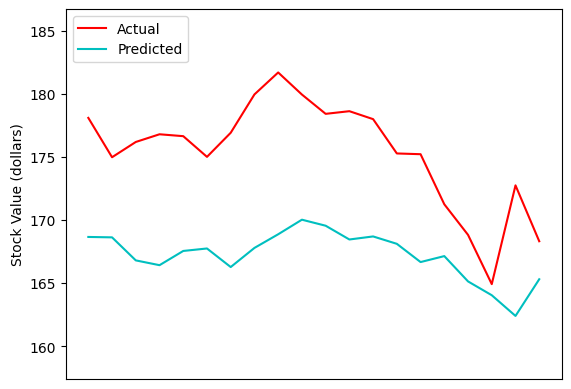

In [25]:
fig, ax = plt.subplots()

ax.plot(actual_new[:,3], 'r-', label='Actual')
ax.plot(pred_new[:,3], 'c-', label='Predicted')

ax.set_ylabel('Stock Value (dollars)')

ax.set_ylim(min(min(actual_new[:,3]), min(pred_new[:,3])) - 5, max(max(actual_new[:,3]), max(pred_new[:,3])) + 5)
plt.xticks([])

ax.legend(loc='upper left')

plt.show()

Nous pouvons également tracer la différence entre la valeur réelle et la valeur prévue.

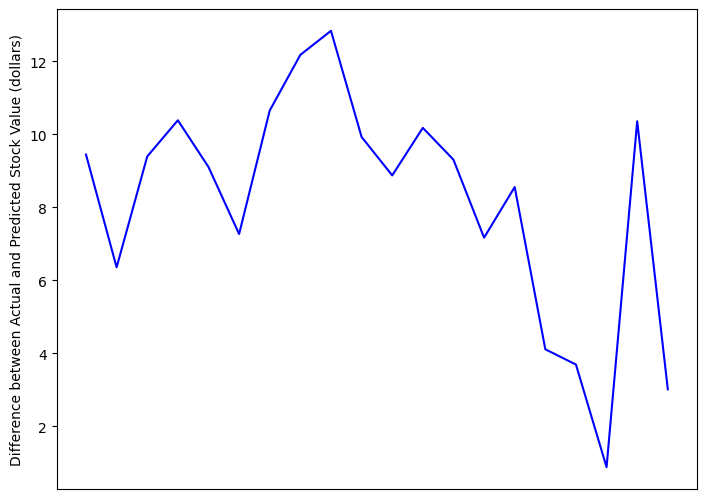

In [26]:
difference = actual_new - pred_new
fig = plt.figure()
diffGraph = fig.add_axes([0,0,1,1])
diffGraph.plot(difference[:, 3], 'b')
diffGraph.set_ylabel('Difference between Actual and Predicted Stock Value (dollars)')
plt.xticks([])
plt.show()

D’après ce graphique, la valeur prédite semble souvent être inférieure à la valeur réelle.


### DIARRA ABOUBACAR


Etudiant a École Nationale des Sciences Appliquées_Tétouan
